In [49]:
# Get stocks data
import yfinance as yf
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Open and read the stock file
with open("stock.txt", "r") as file:
    # Read the contents and split by comma
    stocks = file.read().strip().split(",")

print("Stocks list:", stocks)

Stocks list: ['MSFT', 'AAPL', 'GOOG']


#### hellloo

In [66]:
# EDA
msft = yf.Ticker("MSFT")
hist = msft.history(period = "2y")
fin = msft.financials
act = msft.actions
display(hist.tail(), fin.head(), act.tail())

Open        High         Low       Close  \
Date                                                                        
2024-11-01 00:00:00-04:00  409.010010  415.500000  407.500000  410.369995   
2024-11-04 00:00:00-05:00  409.799988  410.420013  405.570007  408.459991   
2024-11-05 00:00:00-05:00  408.369995  414.899994  408.079987  411.459991   
2024-11-06 00:00:00-05:00  412.420013  420.450012  410.519989  420.179993   
2024-11-07 00:00:00-05:00  421.119995  426.739990  419.880005  426.250000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-11-01 00:00:00-04:00  24230400        0.0           0.0  
2024-11-04 00:00:00-05:00  19672300        0.0           0.0  
2024-11-05 00:00:00-05:00  17626000        0.0           0.0  
2024-11-06 00:00:00-05:00  26681800        0.0           0.0  
2024-11-07 00:00:00-05:00  11217856        0.0           0.0

2024-06-30      2023-06-30  \
Tax Effect Of Unusual Items                -99918000.0      -2850000.0   
Tax Rate For Calcs                               0.182            0.19   
Normalized EBITDA                       133558000000.0  105155000000.0   
Total Unusual Items                       -549000000.0     -15000000.0   
Total Unusual Items Excluding Goodwill    -549000000.0     -15000000.0   

                                           2022-06-30        2021-06-30  
Tax Effect Of Unusual Items                43754000.0  180160797.164637  
Tax Rate For Calcs                              0.131          0.138266  
Normalized EBITDA                       99905000000.0     83831000000.0  
Total Unusual Items                       334000000.0      1303000000.0  
Total Unusual Items Excluding Goodwill    334000000.0      1303000000.0

Dividends  Stock Splits
Date                                              
2023-08-16 00:00:00-04:00       0.68           0.0
2023-11-15 00:00:00-05:00       0.75           0.0
2024-02-14 00:00:00-05:00       0.75           0.0
2024-05-15 00:00:00-04:00       0.75           0.0
2024-08-15 00:00:00-04:00       0.75           0.0

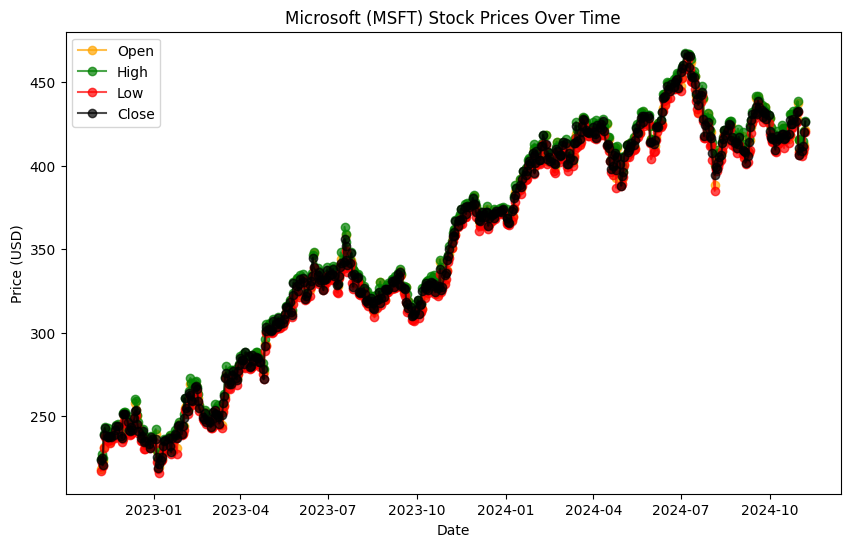

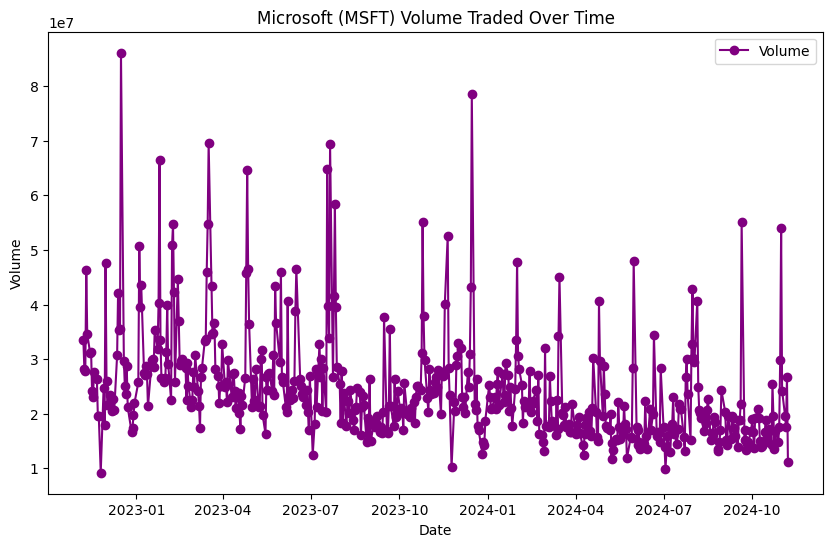

In [67]:
# Plot 1: Open vs Close
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist["Open"], label="Open", marker='o', linestyle='-', alpha = 0.7, color = "orange")
plt.plot(hist.index, hist["High"], label="High", marker='o', linestyle='-', alpha = 0.7, color = "green")
plt.plot(hist.index, hist["Low"], label="Low", marker='o', linestyle='-', alpha = 0.7, color = "red")
plt.plot(hist.index, hist["Close"], label="Close", marker='o', linestyle='-', alpha = 0.7, color = "black")


plt.title("Microsoft (MSFT) Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Plot 2: Volume Traded Over Time
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist["Volume"], label="Volume", color='purple', marker='o', linestyle='-')
plt.title("Microsoft (MSFT) Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

# 

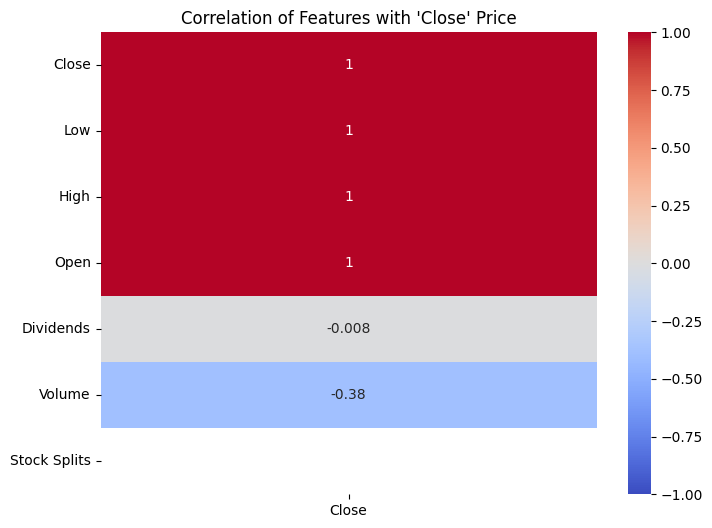

In [68]:
# Calculating the correlation matrix
correlation_matrix = hist.corr()

# Focusing on correlations with the 'Close' feature
close_corr = correlation_matrix[['Close']].sort_values(by='Close', ascending=False)

# Plotting the correlation of each feature with 'Close'
plt.figure(figsize=(8, 6))
sns.heatmap(close_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with 'Close' Price")
plt.show()

# Dividends, stock splits have very low impact to stock price so we can consider it as outlier and drop